In [85]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import math
import random
import os
from ansim_dataset_unconf import *
import cv2

In [8]:
img_path = '/home/rliu/ansim/data/unconfined_steph/cropped_orientation/'
img_list_csv = '/home/rliu/github/ansim/unconfined_orientation/img_list.csv'
train_csv = '/home/rliu/github/ansim/unconfined_orientation/train_unconf.csv'
test_csv = '/home/rliu/github/ansim/unconfined_orientation/test_unconf.csv'
output_path = '/home/rliu/ansim/models/dataset3/6-17_mt_paper_orientation/final.weights'

In [76]:
trainset = ansimDataset(img_list_csv = img_list_csv, seq_csv = train_csv, root_dir = img_path, step=10, random_rotate = True, transform=None, image_size = 128, rand_range=10)
trainloader = torch.utils.data.DataLoader(trainset,
                                                     batch_size=1, shuffle=True,
                                                     num_workers=1)

In [77]:
images.shape

torch.Size([1, 10, 2, 128, 128])

In [80]:
dataiter = iter(trainloader)
for i in range(10):
    images = dataiter.next()
    data_split = torch.split(images, (5,5), dim=1)
    inputs_t = data_split[0]
    target_t = data_split[1]
    inputs_t, target_t = inputs_t.cuda(), target_t.cuda()
#     inputs_t = (inputs_t + 0.5) * 255
#     target_t = (target_t + 0.5) * 255

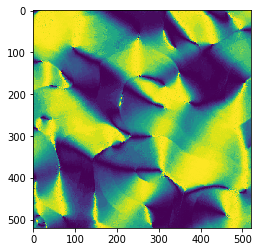

In [184]:
a = cv2.imread('/home/rliu/ansim/data/unconfined_steph/cropped_orientation/000001.jpg',0)
a = a / 255 * math.pi
a = np.power(np.cos(a),2) - 0.5
a = a * 255
a = a.astype(int)
plt.imshow(a)

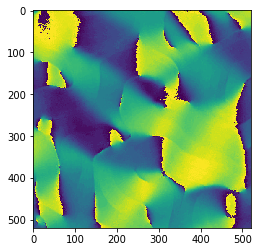

In [183]:
a = cv2.imread('/home/rliu/ansim/data/unconfined_steph/cropped_orientation/000001.jpg',0)
plt.imshow(a)

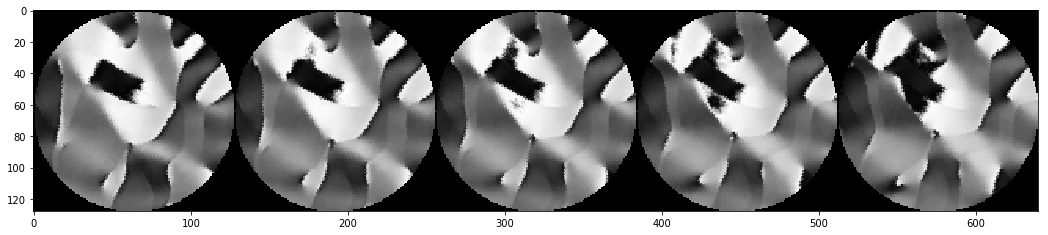

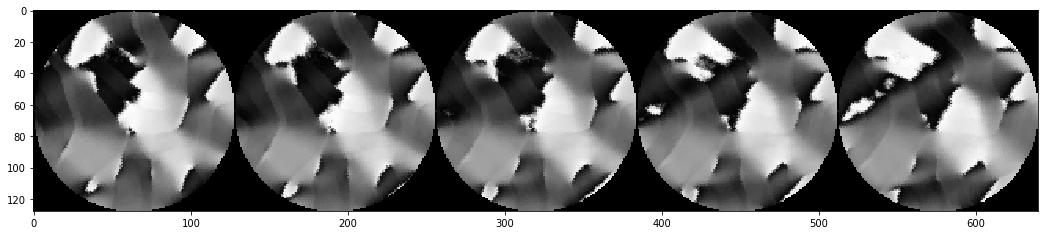

In [81]:
target = target_t[0,:,0,:,:].cpu().detach().numpy()
inputs = inputs_t[0,:,0,:,:].cpu().detach().numpy()

inputs = inputs.reshape(640,128).transpose().astype(int)
target = target.reshape(640,128).transpose().astype(int)

inputs = inputs - inputs.min()
target = target - target.min()

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
ax.imshow(inputs, interpolation='nearest', cmap='gray', vmin=0, vmax=255)

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
ax.imshow(target, interpolation='nearest', cmap='gray', vmin=0, vmax=255)

In [15]:
train = np.zeros(4000)
test  = np.zeros(800)

In [16]:
for i in np.arange(1000):
    train[i] = 1 + 10*i

for i in np.arange(1000):
    train[1000+i] = 12001 + 10*i
    
for i in np.arange(500):
    train[1000+1000+i] = 24001 + 10*i

for i in np.arange(1000):
    train[1000+1000+500+i] = 30001 + 10*i
    
for i in np.arange(500):
    train[1000+1000+500+1000+i] = 42001 + 10*i

In [17]:
for i in np.arange(200):
    test[i] = 10001 + 10*i

for i in np.arange(200):
    test[200+i] = 22001 + 10*i
    
for i in np.arange(100):
    test[200+200+i] = 29001 + 10*i

for i in np.arange(200):
    test[200+200+100+i] = 40001 + 10*i
    
for i in np.arange(100):
    test[200+200+100+200+i] = 47001 + 10*i

array([1.0000e+00, 1.1000e+01, 2.1000e+01, ..., 4.6971e+04, 4.6981e+04,
       4.6991e+04])

In [10]:
train.shape, test.shape

((4000,), (1000,))

In [18]:
df_train = pd.DataFrame(train)
df_train = df_train.astype(int)
df_test = pd.DataFrame(test)
df_test = df_test.astype(int)

In [21]:
df_train[0].to_csv('train_unconf.csv',header=False,index=False)
df_test.to_csv('test_unconf.csv',header=False,index=False)

In [20]:
df_train

,0
0,1
1,11
2,21
3,31
4,41
5,51
6,61
7,71
8,81
9,91


In [26]:
df_img_list = pd.DataFrame([["%0.6d.jpg" % (x+1)] for x in range(48000)], columns=['image path'])
df_img_list.to_csv('img_list.csv',header=False,index=False)

In [23]:
df_img_list.head(10)

,image path
0,000001.jpg
1,000002.jpg
2,000003.jpg
3,000004.jpg
4,000005.jpg
5,000006.jpg
6,000007.jpg
7,000008.jpg
8,000009.jpg
9,000010.jpg


In [ ]:
np.arange()